#### Finding the axes of a hyper-ellipse

Let us try finding the axes of the hyper ellipse described by the
<br>equation $5x^2+6xy+5y^2=20$.
<br>Note: The actual ellipse we use as example is 2D (to facilitate 
<br>visualization), but the code we develop will be general
<br>and extensible to multi-dimensions.

The ellipse equation can be written using matrices and vectors as
<br>$\vec{x}^{T}A\vec{x} = 1$ where
$A=
\begin{bmatrix} 
        5 & 3 \\
        3 & 5 \\
\end{bmatrix} 
\space \space \space
\vec{x} = 
\begin{bmatrix} 
        x \\
        y \\
\end{bmatrix}$.

To find the axes of the hyper ellipse, we need to transform the
<br>coordinate system so that the matrix in the middle becomes diagonal.
<br>Here is how this can be done:
<br>If we diagonalise $A$ into $S\Sigma S^{-1}$, then the ellipse equation
<br>becomes $\vec{x}^{T}S \Sigma S^{-1}\vec{x} = 1$ where $\Sigma$ is a
<br>diagonal matrix.
<br>Since $A$ is symmetric, its eigenvectors are orthogonal.
<br>Hence, the matrix containing these eigenvectors as columns is orthogonal,
<br> i.e., $S^{-1} = S^{T}$. In other words, $S$ is a rotation matrix.
<br>
<br>So the ellipse equation becomes $\vec{x}^{T}S \Sigma S^{T}\vec{x} = 1$
<br>or $\left(\vec{x}^{T}S\right) \Sigma \left(S^{T}\vec{x}\right) = 1$
<br>or $\vec{y}^{T} \Sigma \vec{y} = 1$ where $\vec{y} = S^{T}\vec{x}$.
<br>This is of the desired form since $\Sigma$ is a diagonal matrix.
<br>Remember, $S$ is a rotation matrix. Thus, rotating the coordinate system
<br>by $S$ aligns the coordinate axes with the ellipse axes.


In [1]:
import numpy as np
from sympy import Symbol
import sympy as sy

x = Symbol('x')
y = Symbol('y')
a = Symbol('a')
b = Symbol('b')
ellipse_eq = sy.Eq(5*x**2 + 5*y**2 + 6*x*y, 20)
ellipse_eq

Eq(5*x**2 + 6*x*y + 5*y**2, 20)

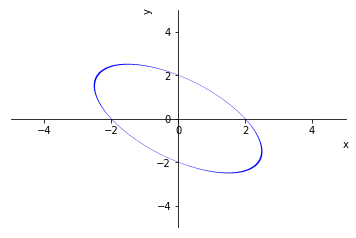

Note that the ellipse major axis is forming an
angle of 45 degrees with X axis.
Rotating coordinate system by this angle
will align ellipse axes with coordinate axes.


In [2]:
# Let us plot this ellipse
%matplotlib inline
import matplotlib.pyplot as plt
import sympy as sy

def sym_eq_plot(eq):
    plot = sy.plot_implicit(eq)
    return plot 
plot = sym_eq_plot(ellipse_eq)

print("Note that the ellipse major axis is forming an\n"
      "angle of 45 degrees with X axis.\n"
      "Rotating coordinate system by this angle\n"
      "will align ellipse axes with coordinate axes.")

In [3]:
A = np.array([[5, 3], [3, 5]])

# Obtain eigen values and vectors of the ellipse
# coeeficients matrix
l, S = np.linalg.eig(np.array(A).astype(np.float64))

print("Eigen values are:  {}\n".format(l))
print("Eigen vectors are columns of S matrix\n{}".format(S))

# Assert that eigen vectors are orthogonal
assert np.dot(S[:, 0], S[:, 1]) == 0.0

# Find the angle between the principal axis and the X-axis.
import math

# Vector corresponding to X-axis
x_axis_vec = np.zeros((A.shape[0]))
x_axis_vec[0] = 1

# First principal eigen vector
first_eigen_vec = S[:, 0]

# Dot product between the two vectors (equals cosine
# of the angle between the directions of the two vectors)
dot_prod = np.dot(x_axis_vec, first_eigen_vec)

# The angle between the two vectors is the cosine inverse
# of the dot-product, in radians
theta = math.acos(dot_prod)

# Convert to degrees from radian
theta = math.degrees(theta)
print("\nRotation angle theta = {:.2f} degrees".format(theta))

Eigen values are:  [8. 2.]

Eigen vectors are columns of S matrix
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

Rotation angle theta = 45.00 degrees


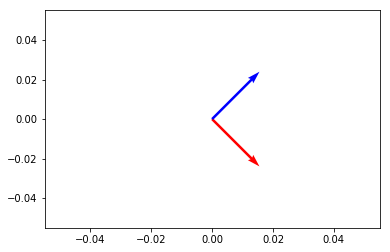

In [4]:
# Plot the eigen vectors
plt.quiver([0], [0], S[:,0], S[:,1],
           color=['r','b','g'], scale=5)
plt.show()

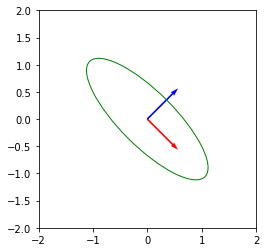

In [5]:
# Let us plot the ellipse along with the axes.
# From our calculations, we know that the angle 
# of rotation is 45 degrees, and that the eigen vectors
# are the columns of S

import matplotlib
fig = plt.figure(0)
ax = fig.add_subplot(111, aspect='equal')

e = matplotlib.patches.Ellipse((0, 0), 1, 3,
                               theta, fc='None',
                               edgecolor='g')
# The ellipse is centered at (0, 0)
# We are using random width and height. 
# Note that the direction of the axes is independent of
# width and height
ax.add_artist(e)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.quiver([0], [0], S[:,0], S[:,1], color=['r','b','g'],
          scale=5)

plt.show()
